In [68]:
import numpy as np
import matplotlib.pyplot as plt

import jax.numpy as jnp
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

In [69]:
from rotation import diff_rotate

In [70]:
# Getting some data
image = shepp_logan_phantom()
image = rescale(image, scale=0.64, mode='reflect', channel_axis=None)

In [71]:
image.shape

(256, 256)

In [73]:
# image coordinates are z, x

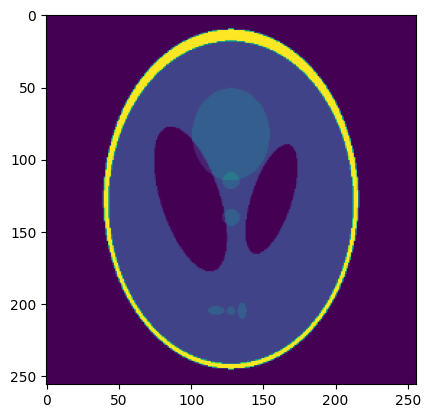

In [74]:
plt.imshow(image)

In [75]:
# now its z, y, x
volume = jnp.expand_dims(image, 1)

In [76]:
volume.shape

(256, 1, 256)

In [64]:
# For some reason we need to rotate a volume in stead of a plane...

volume = np.moveaxis(volume, -1, 1)

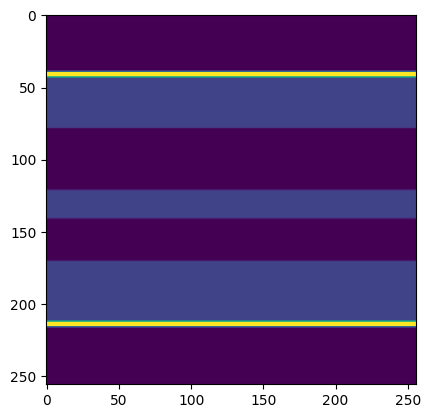

In [67]:
plt.imshow(diff_rotate(volume, 0)[128].squeeze())

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

FBP rms reconstruction error: 0.0283


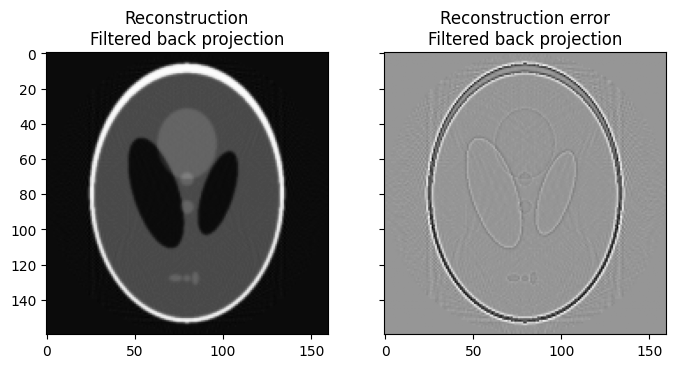

In [2]:
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
error = reconstruction_fbp - image
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()